In [1]:
import math as m

import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import special
from pylab import *
%matplotlib inline

from src import billiardClass as bc
from src import curveClass as cv
from src import plottingFunctions as pf
#from src import verginiSaraceno as vs
#from src import planeWaveDecomposition as pwd

In [2]:
# line
def line_r(t, x0 = 0, y0 = 0, x1 = 1, y1 = 1):
    x = (x1-x0) * t + x0 
    y = (y1-y0) * t + y0
    return x, y

def line_n(t, x0 = 0, y0 = 0, x1 = 1, y1 = 1):
    l = np.sqrt((x1 - x0)**2 + (y1 -y0)**2)
    nx = (y1 - y0)/l
    ny = (x0 - x1)/l
    return nx, ny

def line_arc(t, x0 = 0, y0 = 0, x1 = 1, y1 = 1):
    l = np.sqrt((x1 - x0)**2 + (y1 -y0)**2)
    return t * l

# circle arc
def circle_r(t, R = 1, x0 = 0, y0 = 0, angle = 2*np.pi, shift = 0):
    x = x0 + R * np.cos(t*angle + shift)
    y = y0 + R * np.sin(t*angle + shift)
    return x, y

def circle_n(t, angle = 2*np.pi, shift = 0, **kwargs):
    nx = np.cos(t*angle + shift)
    ny = np.sin(t*angle + shift)
    return nx, ny

def circle_arc(t, R = 1, angle = 2*np.pi, **kwargs):
    return  R * angle *t

In [3]:
params_1 = {"angle" : np.pi/2}
arc_1 = cv.curve(circle_r, circle_n, circle_arc, **params_1)
params_2 = {"x0": 0, "x1": -1, "y0": 1, "y1": 0}
line_2 = cv.curve(line_r, line_n, line_arc, **params_2)
params_3 = {"x0": -1, "x1": -1, "y0": 0, "y1": -1}
line_3 = cv.curve(line_r, line_n, line_arc, **params_3)
params_4 = {"x0": -1, "x1": 0.5, "y0": -1, "y1": -1}
line_4 = cv.curve(line_r, line_n, line_arc, **params_4)
params_5 = {"R" : 0.5, "x0": 0.5, "y0" : -0.5 , "angle" : np.pi/2, "shift" : 3*np.pi/2}
arc_5 = cv.curve(circle_r, circle_n, circle_arc, **params_5)
params_6 = {"x0": 1, "x1": 1, "y0": -0.5, "y1": 0}
line_6 = cv.curve(line_r, line_n, line_arc, **params_6)

curves = [arc_1, line_2, line_3, line_4, arc_5, line_6]
area = np.pi/4 + 1/2 + 1.5 + np.pi *0.5**2 + 0.5**2
dens = [30 for i in curves]


In [4]:
weirdBilliard = bc.billiard(curves, area, point_densities= dens)

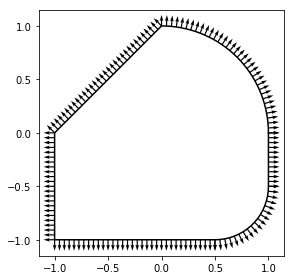

In [5]:
pf.plot_boundary(weirdBilliard , M =5)

In [6]:
k0 = 2.4
dk = 0.05
N = 200
VSresult = weirdBilliard.scaling_eigenvalues(N, k0, dk)
print(VSresult)

[ 2.4486574]


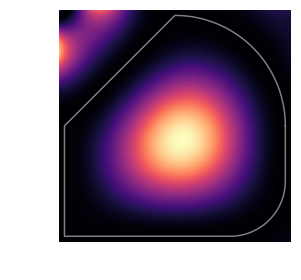

In [7]:
pf.plot_probability(weirdBilliard, VSresult[0])

1 loop, best of 3: 7.94 s per loop


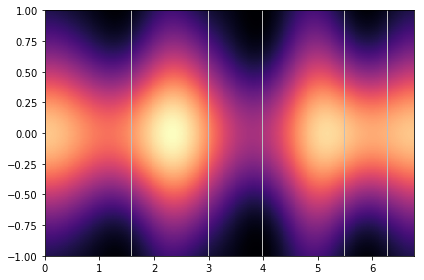

In [8]:
%%timeit
pf.plot_Husimi_function(weirdBilliard, 2.4485833598243114)

In [9]:
k0 = 200.4
dk = 0.05
N = 600
VSresult = weirdBilliard.scaling_eigenvalues(N, k0, dk)
print(VSresult)

[ 200.35739972  200.37593604  200.38215842  200.38821077  200.40857341
  200.42346879  200.43249951  200.44380711]


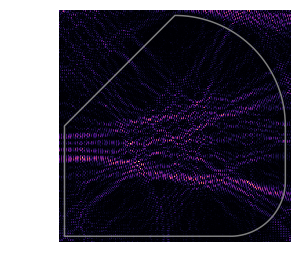

In [10]:
pf.plot_probability(weirdBilliard, 200.38821077)

1 loop, best of 3: 47 s per loop


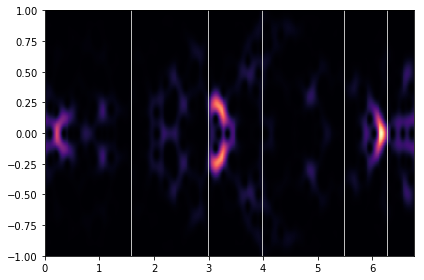

In [11]:
%%timeit
pf.plot_Husimi_function(weirdBilliard, 200.38821077,delta = 2)

1 loop, best of 3: 2min 3s per loop


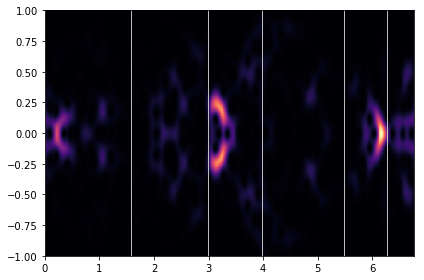

In [30]:
%%timeit
pf.plot_Husimi_function(weirdBilliard, 200.38821077, delta= 5)

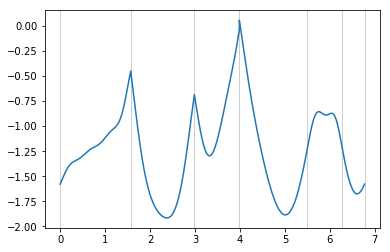

In [13]:
pf.plot_boundary_function(weirdBilliard, 2.4485833598243114 , delta = 5, plot_curve_bounds = True)

In [20]:
k0 = 2.4
dk = 0.05
N = 200
PWDresult = weirdBilliard.PWD_eigenvalue(N, k0, dk)
print(PWDresult)

     fun: 0.0001690742198762976
 message: 'Solution found.'
    nfev: 20
  status: 0
 success: True
       x: 2.4485833598243114


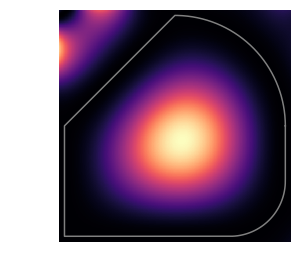

In [21]:
pf.plot_probability(weirdBilliard, PWDresult.x)

In [22]:
k0 = 200.4
dk = 0.05
N = 600
PWDresult = weirdBilliard.PWD_eigenvalue(N, k0, dk)
print(PWDresult)

     fun: 0.27455762125386302
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 200.38859331290254


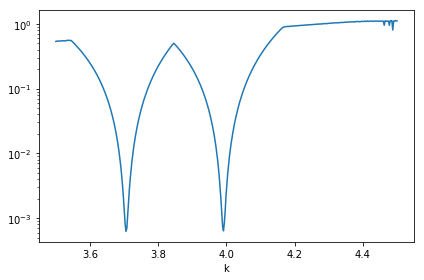

In [24]:
k1 = 3.5
k2 = 4.5
pf.plot_tension(weirdBilliard, k1, k2, N = 200, grid = 400)

     fun: 0.00058734889713195869
 message: 'Solution found.'
    nfev: 22
  status: 0
 success: True
       x: 3.7069010456646119


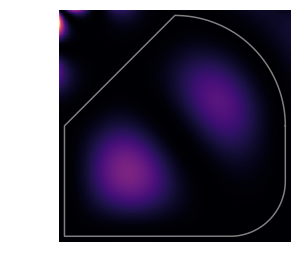

In [25]:
k0 = 3.7
dk = 0.25
N = 500
PWDresult = weirdBilliard.PWD_eigenvalue(N, k0, dk)
print(PWDresult)
pf.plot_probability(weirdBilliard, PWDresult.x)

     fun: 0.00056858660545563435
 message: 'Solution found.'
    nfev: 18
  status: 0
 success: True
       x: 3.9907882487595026


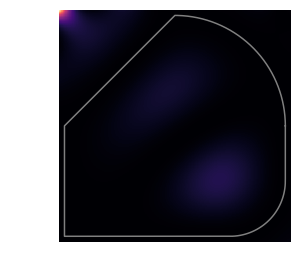

In [26]:
k0 = 4
dk = 0.25
N = 500
PWDresult = weirdBilliard.PWD_eigenvalue(N, k0, dk)
print(PWDresult)
pf.plot_probability(weirdBilliard, PWDresult.x)